In [1]:
import requests 
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def links(urls, x):
    """
    Function to get website urls
    Takes in a url from any website 
    and a filter by to search for what urls start with
    
    """
    new_list = []
    content = requests.get(urls)

    soup = BeautifulSoup(content.text, 'html.parser')
    href = soup.find_all('a', href = True)
    for link in href:
        if link['href'].startswith(x):
            new_list.append(link['href'])
    
    return new_list

In [6]:
def players_links(url, x, limit):
    """
    import bs4
    import request
    Gets back a list of url 
    argument url takes a actual url
    x filters out href elements
    Created by Jesus Christ
    
    """
    players_li = []
    movie_url = url
    req_url = requests.get(movie_url)
    soup = BeautifulSoup(req_url.text, 'html.parser')
    href = soup.find_all('a', href = True)
    for links in href: 
        if links['href'].startswith(x):
            players_li.append(links['href'])
    return(players_li[0:limit])


In [7]:
link_2016 = 'https://www.hltv.org/stats/players?startDate=2016-01-01&endDate=2016-12-31'
link_2017 = 'https://www.hltv.org/stats/players?startDate=2017-01-01&endDate=2017-12-31'
link_2018 = 'https://www.hltv.org/stats/players?startDate=2018-01-01&endDate=2018-12-31'
link_2019 = 'https://www.hltv.org/stats/players?startDate=2019-01-01&endDate=2019-12-31'

In [54]:
players_url = players_links(link_2017, "/stats/players/", 511)

In [55]:
len(players_url)

511

In [56]:
players_url

['/stats/players/11893/ZywOo?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/7938/XANTARES?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/7131/BnTeT?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/10588/Liazz?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/9960/frozen?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/7998/s1mple?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/8601/zhokiNg?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/9102/Sico?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/9216/coldzera?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/10774/Freeman?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/3972/huNter-?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/12958/AE?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/8552/Attacker?startDate=2017-01-01&endDate=2017-12-31',
 '/stats/players/11916/sergej?startDate=2017-01-01&endDate=2017-12-31',
 

In [57]:
list_17 = []
for link in players_url:
    
    home_url = "https://www.hltv.org/" + link
    
    req_url = requests.get(home_url)
        
    soup = BeautifulSoup(req_url.text)
    
    player_dict = {}
    
    player_dict['Name'] = soup.find('h1').text
    
    data = soup.find_all('span')
    
    for i, span in enumerate(data):
        if 'Total kills' in span:
            player_dict['total_kills'] = data[i+1].text
        if 'Headshot %' in span:
            player_dict['headshot_%'] = data[i+1].text
        if 'Total deaths' in span:
            player_dict['total_deaths'] = data[i+1].text
        if 'K/D Ratio' in span:
            player_dict['k/d_ratio'] = data[i+1].text
        if 'Damage / Round' in span:
            player_dict['damage/round'] = data[i+1].text
        if 'Grenade dmg / Round' in span:
            player_dict['grenadedmg/round'] = data[i+1].text
        if 'Maps played' in span:
            player_dict['maps_played'] = data[i+1].text
        if 'Rounds played' in span:
            player_dict['rounds_played'] = data[i+1].text
        if 'Kills / round' in span:
            player_dict['kills/round'] = data[i+1].text
        if 'Assists / round' in span:
            player_dict['assists/round'] = data[i+1].text
        if 'Deaths / round' in span:
            player_dict['death/round'] = data[i+1].text
        if 'Saved by teammate / round' in span:
            player_dict['savedbyteammate/round'] = data[i+1].text
        if 'Saved teammates / round' in span:
            player_dict['savedteammates/round'] = data[i+1].text
        
    
    list_17.append(player_dict)

In [13]:
list_16

[{'Name': 'kNgV-',
  'total_kills': '2439',
  'headshot_%': '27.1%',
  'total_deaths': '1800',
  'k/d_ratio': '1.35',
  'damage/round': '88.7',
  'grenadedmg/round': '2.1',
  'maps_played': '113',
  'rounds_played': '2836',
  'kills/round': '0.86',
  'assists/round': '0.12',
  'death/round': '0.63',
  'savedbyteammate/round': '0.08',
  'savedteammates/round': '0.09'},
 {'Name': 'Kaze',
  'total_kills': '2190',
  'headshot_%': '29.5%',
  'total_deaths': '1591',
  'k/d_ratio': '1.38',
  'damage/round': '88.5',
  'grenadedmg/round': '3.2',
  'maps_played': '97',
  'rounds_played': '2586',
  'kills/round': '0.85',
  'assists/round': '0.14',
  'death/round': '0.62',
  'savedbyteammate/round': '0.08',
  'savedteammates/round': '0.10'},
 {'Name': 'XANTARES',
  'total_kills': '4942',
  'headshot_%': '53.3%',
  'total_deaths': '3939',
  'k/d_ratio': '1.25',
  'damage/round': '96.9',
  'grenadedmg/round': '2.4',
  'maps_played': '216',
  'rounds_played': '5586',
  'kills/round': '0.88',
  'assis

In [60]:
list_17
df_17 = pd.DataFrame(list_17)
df_17['headshot_%'] = df_17['headshot_%'].str.split('%').str[0].astype(float)

col_list = df_17.columns.tolist()[1:]
for c in col_list:
    df_17[c] = df_17[c].astype(float)
    
df_17.to_csv(r'/Users/bi/Documents/CS-GO-webscrapper/playerstats_2017.csv', index = False)

In [ ]:
list_19

In [ ]:
list_19

# 2016 stats: (328 players)

In [14]:
df_16 = pd.DataFrame(list_16)

In [19]:
df_16.columns

Index(['Name', 'total_kills', 'headshot_%', 'total_deaths', 'k/d_ratio',
       'damage/round', 'grenadedmg/round', 'maps_played', 'rounds_played',
       'kills/round', 'assists/round', 'death/round', 'savedbyteammate/round',
       'savedteammates/round'],
      dtype='object')

In [22]:
# removing % sign from headshot_% and converting it into float
# converting all columns into float
# saving dataframe into CSV
df_16['headshot_%'] = df_16['headshot_%'].str.split('%').str[0].astype(float)

col_list = df_16.columns.tolist()[1:]
for c in col_list:
    df_16[c] = df_16[c].astype(float)
    
df_16.to_csv(r'/Users/bi/Documents/CS-GO-webscrapper/playerstats_2016.csv', index = False)

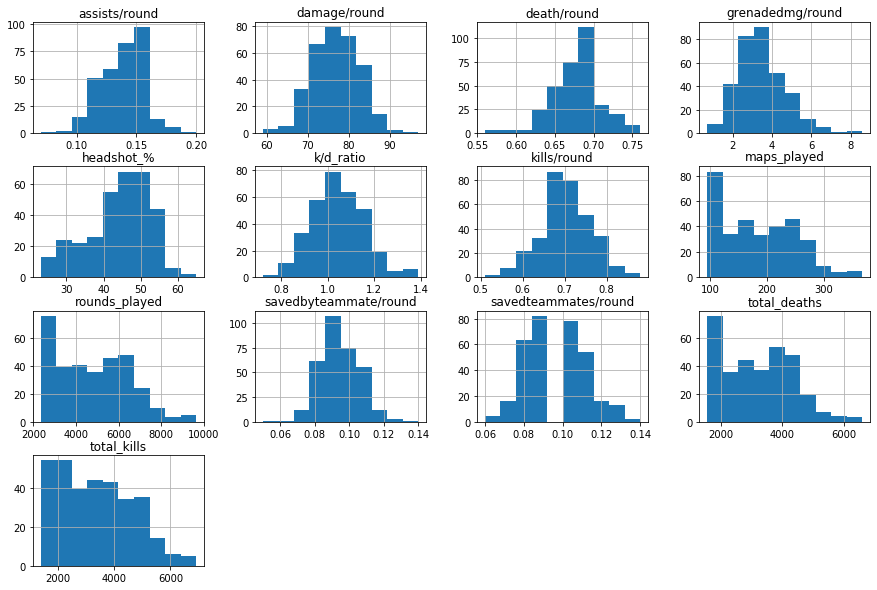

In [59]:
# checking the distribution for columns
# most are normally distributed
df_16.hist(figsize=(15,10));

In [61]:
std = df_16[['k/d_ratio']].std()
mean = df_16[['k/d_ratio']].mean()
zscore = (df_16[['k/d_ratio']] - mean) / std

In [62]:
zscore

,k/d_ratio
0,2.710987
1,2.976236
2,1.826823
3,3.064653
4,2.445738
...,...
323,-2.063499
324,-2.240332
325,-2.240332
326,-2.859246


In [63]:
import math
def std_norm_percentile_from_zscore(z_score):
    return .5 * (math.erf(z_score / 2 ** .5) + 1)

In [64]:
zscore['k/d_ratio']

0      2.710987
1      2.976236
2      1.826823
3      3.064653
4      2.445738
         ...   
323   -2.063499
324   -2.240332
325   -2.240332
326   -2.859246
327   -2.859246
Name: k/d_ratio, Length: 328, dtype: float64

In [65]:
pct_list = []
for score in zscore['k/d_ratio'].tolist():
    percentile = std_norm_percentile_from_zscore(score)
    pct_list.append(percentile)
    
print(pct_list)

[0.9966458399269177, 0.9985409513403041, 0.9661368203746942, 0.9989103862762657, 0.9927722006482887, 0.9943640481793715, 0.9966458399269177, 0.9907963520827909, 0.9817839805364073, 0.9817839805364073, 0.9505275464851117, 0.9966458399269177, 0.9505275464851117, 0.8487472922394261, 0.9296457201931698, 0.868534829802062, 0.9169341821770647, 0.9505275464851117, 0.9505275464851117, 0.9589304178981152, 0.9025681835881967, 0.9661368203746942, 0.9296457201931698, 0.9169341821770647, 0.8864587352836906, 0.8487472922394261, 0.868534829802062, 0.9774465386480615, 0.9589304178981152, 0.9025681835881967, 0.8487472922394261, 0.8035147309979118, 0.9296457201931698, 0.8864587352836906, 0.8035147309979118, 0.7781101606978329, 0.8864587352836906, 0.868534829802062, 0.8864587352836906, 0.8487472922394261, 0.8864587352836906, 0.9296457201931698, 0.868534829802062, 0.827072347977796, 0.868534829802062, 0.827072347977796, 0.9025681835881967, 0.868534829802062, 0.827072347977796, 0.7781101606978329, 0.750927

In [66]:
round_pct = [pct*100 for pct in pct_list]
round_pct
for pct in round_pct:
    n = (pct/100*(328 + 1))
    print(n)

327.89648133595597
328.51997299096
317.8590139032744
328.6415170848914
326.622054013287
327.1457718510132
327.89648133595597
325.9719998352382
323.00692959647796
323.00692959647796
312.7235627936018
327.89648133595597
312.7235627936018
279.2378591467712
305.8534419435529
285.7479590048784
301.6713459362543
312.7235627936018
312.7235627936018
315.4881074884799
296.94493240051673
317.8590139032744
305.8534419435529
301.6713459362543
291.6449239083342
279.2378591467712
285.7479590048784
321.57991121521223
315.4881074884799
296.94493240051673
279.2378591467712
264.356346498313
305.8534419435529
291.6449239083342
264.356346498313
255.99824286958702
291.6449239083342
285.7479590048784
291.6449239083342
279.2378591467712
291.6449239083342
305.8534419435529
285.7479590048784
272.1068024846949
285.7479590048784
272.1068024846949
296.94493240051673
285.7479590048784
272.1068024846949
255.99824286958702
247.0549927110796
247.0549927110796
255.99824286958702
272.1068024846949
237.56009836068267
29